In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../00_raw_data/hydride_dist.csv')

In [3]:
df.head()

,dist,run
0,6.358545,wt_mna
1,8.956494,wt_mna
2,8.261289,wt_mna
3,8.505263,wt_mna
4,8.447072,wt_mna


In [4]:
def get_freqs(df: pd.DataFrame, 
              thresh: float
             ) -> pd.DataFrame:
    
    runs = df['run'].unique()
    total = df.shape[0] / len(runs)
    
    res = []
    for run in runs:
        subset = df.query("run == @run and dist <= @thresh")
        active = subset.shape[0]
        ratio = active/total
        
        res.append([run, ratio, 1-ratio])
        
    df = pd.DataFrame(res, columns=['run', 'active', 'inactive'])
    
    return df

In [5]:
freqs = get_freqs(df, 4.5)
freqs.to_csv('../00_raw_data/cofa_poses.csv', index=False)
freqs

,run,active,inactive
0,wt_mna,0.0030,0.9970
1,mut_mna,0.5975,0.4025
2,wt_nad,0.7410,0.2590


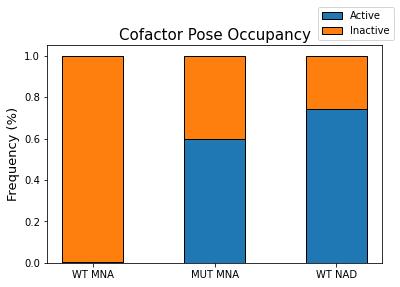

In [6]:
labels = {'wt_mna' : 'WT MNA',
          'mut_mna' : 'MUT MNA',
          'wt_nad' : 'WT NAD'}

labs = [labels[run] for run in freqs['run']]

fig, ax = plt.subplots(figsize=(6, 4))
width=0.20
x = [0, 0.4, 0.8]

ax.bar(x, freqs['active'], width, label='Active', edgecolor='k')
ax.bar(x, freqs['inactive'], width, label='Inactive', edgecolor='k', bottom=freqs['active'])

ax.set_xticks(x)
ax.set_xticklabels(labs)
ax.tick_params(axis='x', which='major')
ax.tick_params(axis='y')
ax.legend(bbox_to_anchor=(1.05, 1.2))
ax.set_ylabel('Frequency (%)', size=13)
ax.set_title('Cofactor Pose Occupancy', size=15)
plt.savefig('pose.png')